<a href="https://colab.research.google.com/github/avivlazar/Algorithms2018/blob/master/OpenCV_Mehin_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

def read_image(file_path, size=None):
  img = cv2.imread(file_path)
  if size is not None:
    img = cv2.resize(img, size)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img


Question 1


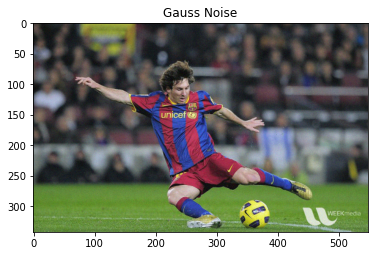

In [2]:
def gauss_noise(image, mean, sigma):
      gauss = np.random.normal(mean, sigma, image.shape)
      gauss.reshape(image.shape)
      noisy = image + gauss
      cv2.normalize(noisy, noisy, 0, 1, cv2.NORM_MINMAX)
      return noisy

image = plt.imread("messi.jpg")
noisy_image = gauss_noise(image, mean=0, sigma=5)
plt.title("Gauss Noise")
plt.imshow(noisy_image)

In [0]:
#@title Question 2


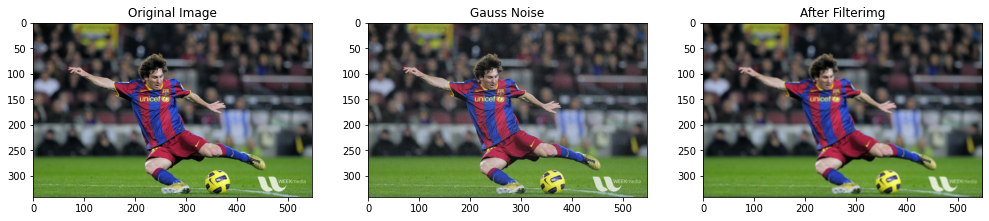

In [3]:
def convolve2d(image, kernel):
      if len(image.shape) < len(kernel.shape):
        exit(1)
      
      if len(image.shape) == 3:
        return convolve2d_high(image, kernel)
      elif len(image.shape) == 2:
        return convolve2d_low(image, kernel)
      else:
        exit(1)
      

def convolve2d_low(image, kernel):
      img_shape = image.shape
      kernel_shape = kernel.shape

      hieght = img_shape[0]-kernel_shape[0]+1
      width = img_shape[1]-kernel_shape[1]+1

      img_cov = np.zeros([hieght, width])
      
      for row in range(hieght):
        for col in range(width):
          row_e = row+kernel_shape[0]
          col_e = col+kernel_shape[1]
          image_k = image[row:row_e, col:col_e]
          my_dot = np.dot(image_k, kernel)
          img_cov[row, col] = np.sum(my_dot)
      
      return img_cov


def convolve2d_high(image, kernel):
      if len(kernel.shape) == 2:
         kernel = kernel.reshape(kernel.shape[0], kernel.shape[1], 1)
         kernel = np.repeat(kernel, 3, axis=2)

      kernel_shape = kernel.shape

      hieght = image.shape[0]
      width = image.shape[1]
      img_cov = np.zeros([hieght, width, kernel_shape[2]])

      
      padding = kernel.shape[0] // 2

      image_pad = np.zeros((2*padding + image.shape[0], 2*padding + image.shape[1], image.shape[2]))

      image_pad[padding:image.shape[0]+padding, padding:image.shape[1]+padding, :] = image

      for row in range(hieght):
        for col in range(width):
          row_e = row+kernel_shape[0]
          col_e = col+kernel_shape[1]
          for channel in range(kernel_shape[2]):    
            image_k = image_pad[row:row_e, col:col_e, channel]
            my_dot = np.dot(image_k, kernel)
            img_cov[row, col, channel] = np.sum(my_dot)
      
      return img_cov


plt.figure(figsize=[17,17])
plt.subplot(131)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(132)
plt.title("Gauss Noise")
plt.imshow(noisy_image)

kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
clean_image = convolve2d(image, kernel)
cv2.normalize(clean_image, clean_image, 0, 1, cv2.NORM_MINMAX)
plt.subplot(133)
plt.title("After Filterimg")
plt.imshow(clean_image)

In [0]:
#@title Question 3


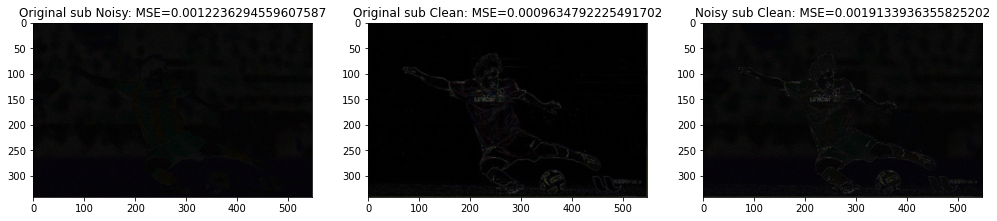

In [4]:
def calc_mse(img1, img2):
  return np.sum(np.power(np.subtract(img1, img2), 2)) / (img1.shape[0] * img1.shape[1] * img1.shape[2])




plt.figure(figsize=[17,17])

image_fload = image.astype(np.float32)
cv2.normalize(image_fload, image_fload, 0, 1, cv2.NORM_MINMAX)


abs_image = np.abs(image_fload - noisy_image)
plt.subplot(131)
plt.title(f"Original sub Noisy: MSE={calc_mse(image_fload, noisy_image)}")
plt.imshow(abs_image)


abs_image = np.abs(image_fload - clean_image)
plt.subplot(132)
plt.title(f"Original sub Clean: MSE={calc_mse(image_fload, clean_image)}")
plt.imshow(abs_image)


abs_image = np.abs(noisy_image - clean_image)
plt.subplot(133)
plt.title(f"Noisy sub Clean: MSE={calc_mse(noisy_image, clean_image)}")
plt.imshow(abs_image)




<BarContainer object of 256 artists>

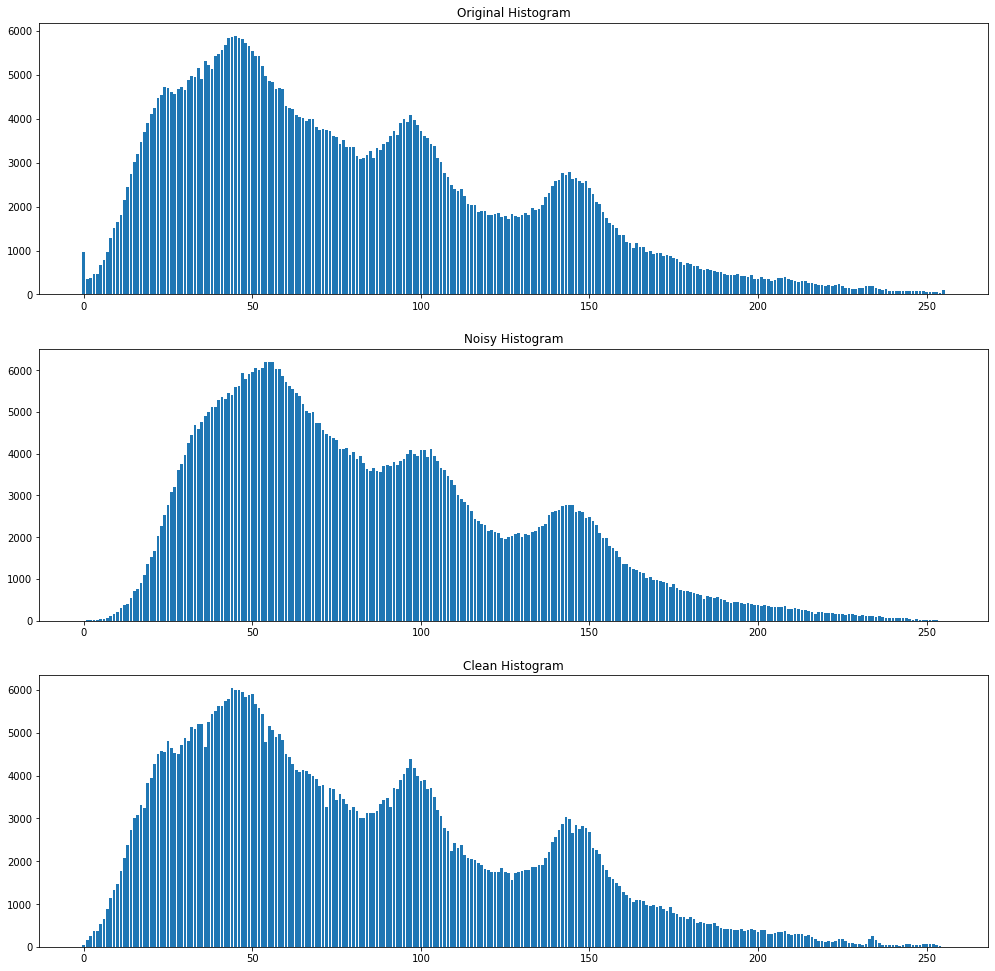

In [5]:
def calc_histogram(img):
  histo = np.zeros((256,)).tolist()
  img_uint8 = np.copy(img)
  cv2.normalize(img_uint8, img_uint8, 0, 255, cv2.NORM_MINMAX)
  img_uint8 = img_uint8.astype(np.uint8)

  for indx in range(len(histo)):
    histo[indx] = np.sum(np.where(img_uint8 == indx, 1, 0))

  return histo

plt.figure(figsize=[17,17])

histo = calc_histogram(image_fload)
x_axis = np.arange(len(histo))
plt.subplot(311)
plt.title('Original Histogram')
plt.bar(x_axis, histo)

histo = calc_histogram(noisy_image)
x_axis = np.arange(len(histo))
plt.subplot(312)
plt.title('Noisy Histogram')
plt.bar(x_axis, histo)

histo = calc_histogram(clean_image)
x_axis = np.arange(len(histo))
plt.subplot(313)
plt.title('Clean Histogram')
plt.bar(x_axis, histo)

In [0]:
#@title Question 4


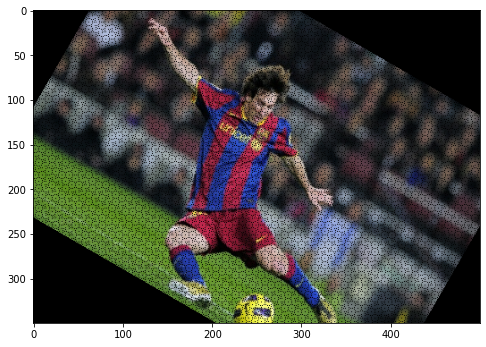

In [6]:
def rotation_matrix(angle):
  rad_ang = angle * np.pi / 180.
  return np.asarray([[np.cos(rad_ang), -np.sin(rad_ang)], 
                     [np.sin(rad_ang), np.cos(rad_ang)]]).reshape((2, 2))


def rotate_image(image, angle):
  copy_image = np.zeros(image.shape)
  h = image.shape[0] // 2
  w = image.shape[1] // 2
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      n_col, n_row  = np.matmul(rotation_matrix(angle), 
                              np.asarray([col - w, row - h]).reshape(2, 1))
      n_row, n_col = int(n_row) + h, int(n_col) + w
      if n_row < 0 or n_row >= h * 2 or n_col < 0 or n_col >= w * 2:
        continue
      copy_image[n_row, n_col, :] = image[row, col, :]
  return copy_image

plt.figure(figsize=[8,8])

angle = 30
messi = read_image('messi.jpg', size=(500, 350))
messi = rotate_image(messi, angle)
cv2.normalize(messi, messi, 0, 255, cv2.NORM_MINMAX)
messi = messi.astype(np.uint8)
plt.imshow(messi)



In [0]:
#@title Question 5


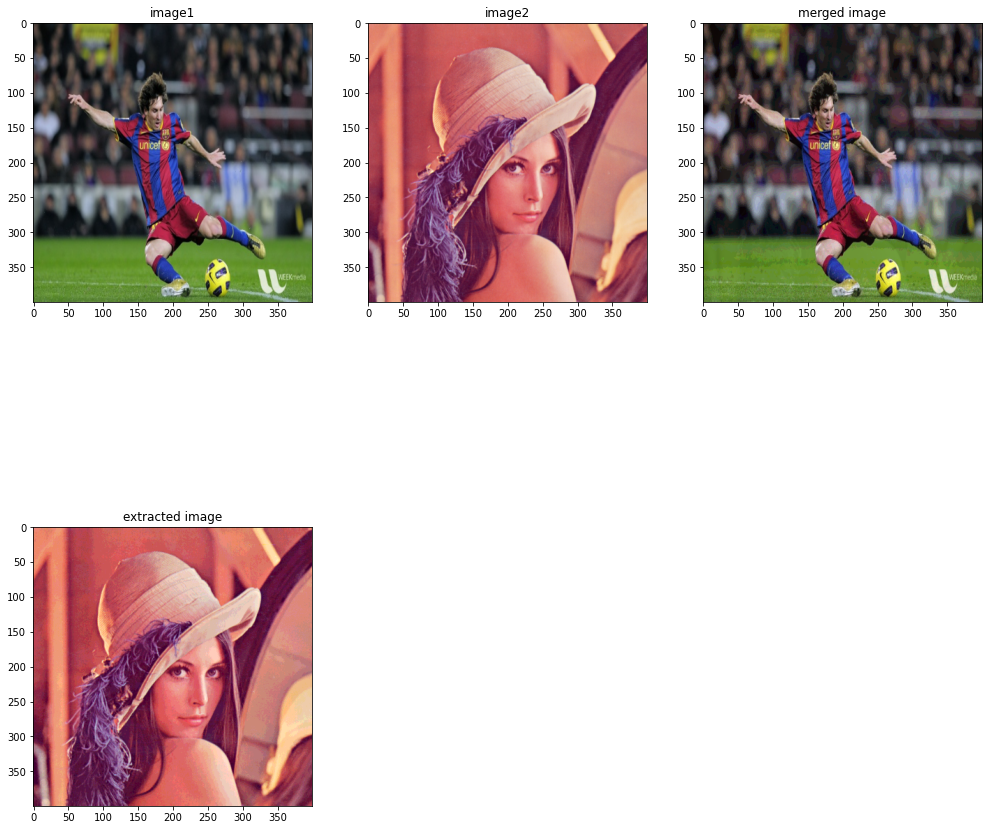

In [7]:
# convert from int to binary
def int_to_bin(rgb):
  r, g, b = rgb
  return ('{0:08b}'.format(r),
          '{0:08b}'.format(g),
          '{0:08b}'.format(b))
  
def merge_rgb(rgb1, rgb2):
  r1, g1, b1 = rgb1
  r2, g2, b2 = rgb2

  # merge the two pixels into 1 pixel by taking the 4 highest digits: 
  # for example: 11001100, 11101010 ==>.  1100|1110
  rgb = (r1[:4] + r2[:4],
         g1[:4] + g2[:4],
         b1[:4] + b2[:4])
  return rgb

# convert from binary to int
def bin_to_int(rgb):
  r, g, b = rgb
  return (int(r, 2),
          int(g, 2),
          int(b, 2))
  
def merge(img1, img2):
  if img1.shape[0] < img2.shape[0] or img1.shape[1] < img2.shape[1]:
    return
  
  merged = np.zeros(img1.shape)

  for row in range(img1.shape[0]):
      for col in range(img1.shape[1]):
        if row >= img2.shape[0] or col >= img2.shape[1]:
          merged[row, col, :] = img1[row, col, :]
          continue
        
        # translate the integers to binary
        rgb1 = int_to_bin(img1[row, col, :])
        rgb2 = int_to_bin(img2[row, col, :])

        rgb_merged = merge_rgb(rgb1, rgb2)

        merged[row, col, :] = bin_to_int(rgb_merged)
  return merged

def extract_bin(rgb):
  r, g, b = rgb
  return (r[4:] + "0000",
          g[4:] + "0000",
          b[4:] + "0000")

def extract(img):
  extracted = np.zeros(img.shape) 

  for row in range(img.shape[0]):
      for col in range(img.shape[1]):
        
        # the pixel which devided to 4+4 bimary digits
        rgb = int_to_bin(img[row, col, :])

        # get the "hidden" pixel 
        rgb_merged = extract_bin(rgb)

        # conver from binary to int
        extracted[row, col, :] = bin_to_int(rgb_merged)
  return extracted

plt.figure(figsize=[17,17])    


size = (400, 400)
messi = read_image('messi.jpg', size=size)
plt.subplot(231)
plt.title("image1")
plt.imshow(messi)

lenna = read_image('Lenna.png', size=size)
plt.subplot(232)
plt.title("image2")
plt.imshow(lenna)

## MERGE ##
merged_image = merge(messi, lenna)
cv2.normalize(merged_image, merged_image, 0, 255, cv2.NORM_MINMAX)
merged_image = merged_image.astype(np.uint8)
plt.subplot(233)
plt.title("merged image")
plt.imshow(merged_image)

## EXTRACT ##
extracted_image = extract(merged_image)
cv2.normalize(extracted_image, extracted_image, 0, 255, cv2.NORM_MINMAX)
extracted_image = extracted_image.astype(np.uint8)
plt.subplot(234)
plt.title("extracted image")
plt.imshow(extracted_image)




        
